In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [818]:
customers = pd.read_csv(r"customers.csv")
items = pd.read_csv(r"Items.csv")
orders = pd.read_csv(r"orders.csv")
order_item = pd.read_csv(r"order_item.csv")


# חלק א'
# הסבר במילים שלך-
# .1 מה היתרונות ומה החסרונות של שימוש במידע גולמי מהלקוח ללא עיבוד או ניקוי?


##  עבודה עם מידע גולמי תיתן מצד אחד מקסימום מידע מהימן, כיוון שאיש לא נגע בו. מאידך, מידע גולמי עשוי לכלול כפילויות רבות וכן מידע חסר


# .2 אילו סוגי טעויות עלולות להופיע במידע גולמי שמגיע מהלקוח, וכיצד ניתן
# לזהות ולתקן אותן?


## טעויות של מידע גולמי אשר מגיע מן הלקוח יכול להיות מאופיין בכפילויות מידע, וכן מידע חסר. את הכפילויות ניתן להסיר, ולגבי מידע חסר יש לבצע החלטה מושכלת כיצד להתמודד עימו - למחוק, לתת ערך כלשהו, להשאיר כחסר. את המידע הכפול או החסר ניתן לזהות בקלות ע"י פעולות duplicated()' isna()
## ישנם מקרים בהם מידע שחסר בעמודה זו קיים דווקא בעמודה אחרת, וניתן לאחד את המידע הרצוי ולהסיר את הכפילויות המיותרות, לפי הצורך


# .3 קיבלת תשובות משוב מסקר שערכת לחברת מים מינרלים המכיל: מס' לקוח,
# תאריך המשוב, מקום מגורים וציון מספרי של איכות השירות )בין 1-10(.
# בחלק מהרשומות חסר תאריך, הצע דרך פתרון להשלמת המידע


##  ניתן לבצע ממוצע תאריכים בין הקיימים ולמקם בו את התאריך החסר

# בחלק מהרשומות חסר מקום מגורים, הצע דרך פתרון להשלמת המידע.


## ניתן לבדוק את מקום המגורים המופיע מס' רב ביותר של פעמים, ולתת אותו לערך החסר

# בחלק מהרשומות מופיע פעמיים או יותר רשומות עם אותו מס' לקוח, הצע דרך
# פתרון לבעיה.


## יש לאחד ערכים שנמצאים ברשומה זו ולא בזו ולנסות לדלות מקסימום מידע. לאחר מכן, למחוק את הכפילות עם מספר הערכים החסרים הגדול ביותר

# בחלק מהמקומות חסר הציון המספרי- הצע 3 רעיונות )לפחות( להשלמת הציון

## 1. ניתן לתת את הציון הממוצע
## 2. ניתן לבדוק את הציון הקודם שניתן ולחזור עליו
## 3. ניתן לבדוק את הציון החציוני
## 4. ניתן לתת את הציון החוזר על עצמו מספר רב ביותר של פעמים

# חלק ב'
# פייטון-
# .4 לפניך רשימת סקר מדגם מסעיף :3
# גם בלינק
# https://github.com/pythonai170624/exam/blob/main/seker.py
# data = [
# {"cust_id": 1, "timestamp": "2024-01-01", "residence": "Tel Aviv", "grade": 8},
# {"cust_id": 2, "timestamp": "2024-01-02", "residence": "Jerusalem", "grade": None},
# {"cust_id": 1, "timestamp": "2024-01-03", "residence": "Tel Aviv", "grade": 8},
# {"cust_id": 3, "timestamp": "2024-01-04", "residence": None, "grade": 7},
# {"cust_id": 2, "timestamp": "2024-01-05", "residence": "Jerusalem", "grade": None}
# ]
# - כתוב קוד )ללא שימוש בספריית PD )אשר מוחק כפילויות עבור אותו
# הלקוח, ומשאיר רק את המופע הראשון
# - כתוב קוד )ללא שימוש בספריית PD )אשר מוחק כל שורה שיש בתוכה את
# הערך None
# - כתוב קוד )ללא שימוש בספריית PD )אשר מחשב את ממוצע הציונים
# ומחליף את ציוני ה- None בממוצע


# - כעת צור DF עם המידע, ובצע את 3 המשימות בפקודות של PD
# - השתמש בפקודת apply ו - groupby והחלף את ציוני ה- None בממוצע
# של אותו העיר )לדוגמא ברשומה שחסר בה ציון והתושב גר בתל-אביב,
# יוחלף הציון None בממוצע של תל אביב(

In [1070]:
data = [
    {"cust_id": 1, "timestamp": "2024-01-01", "residence": "Tel Aviv", "grade": 8},
    {"cust_id": 2, "timestamp": "2024-01-02", "residence": "Jerusalem", "grade": None},
    {"cust_id": 1, "timestamp": "2024-01-03", "residence": "Tel Aviv", "grade": 8},
    {"cust_id": 3, "timestamp": "2024-01-04", "residence": None, "grade": 7},
    {"cust_id": 2, "timestamp": "2024-01-05", "residence": "Jerusalem", "grade": None}
]

df = pd.DataFrame(data)

display("original df", df)
print("dropped duplicates")
df.drop_duplicates(keep='first', inplace=True)
display(df)
print()
display("dropped NaNs",df.dropna())
df_mean = df['grade'].mean()

display(df.fillna(df_mean))

'original df'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,NaN
2,1,2024-01-03,Tel Aviv,8.0
3,3,2024-01-04,None,7.0
4,2,2024-01-05,Jerusalem,NaN


dropped duplicates


,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,NaN
2,1,2024-01-03,Tel Aviv,8.0
3,3,2024-01-04,None,7.0
4,2,2024-01-05,Jerusalem,NaN


'dropped NaNs'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
2,1,2024-01-03,Tel Aviv,8.0


,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.000000
1,2,2024-01-02,Jerusalem,7.666667
2,1,2024-01-03,Tel Aviv,8.000000
3,3,2024-01-04,7.666667,7.000000
4,2,2024-01-05,Jerusalem,7.666667


# חלק ג'
# הכנת מידע
# לפניך קבצי המידע הבאים:
# Customers.csv, Items.csv, order_item.csv, orders.csv

# .5 חקור את המידע
# - הדפס לכל טבלה )בפעולה אחת פר טבלה( את פרטי שמות העמודות ,
# הטיפוס, וכמות העמודות שאינן Null( ועוד(
# - הדפס לכל טבלה )בפעולה אחת פר טבלה( את שמות העמודות ,הערכים
# הממוצעים, ערך MIN, ערך MAX חציון )ועוד(
# - הדפס לכל טבלה את 5 הערכים הראשונים

In [39]:
display("items", items.info())
print()
display("customers", customers.info())
print()
display("orders", orders.info())
print()
display("order_item", order_item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50 non-null     int64  
 1   item_name          50 non-null     object 
 2   item_category      39 non-null     object 
 3   item_price         50 non-null     float64
 4   stock_quantity     45 non-null     float64
 5   item_brand         42 non-null     object 
 6   item_availability  50 non-null     bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 2.5+ KB


'items'

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   first_name    494 non-null    object 
 2   last_name     494 non-null    object 
 3   gender        447 non-null    object 
 4   age           475 non-null    float64
 5   nationallity  494 non-null    object 
 6   joining_date  439 non-null    object 
 7   phone_number  500 non-null    object 
 8   email         500 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


'customers'

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          600 non-null    int64  
 1   customer_id       555 non-null    float64
 2   delivery_address  600 non-null    object 
 3   delivery_days     525 non-null    float64
 4   order_date        600 non-null    object 
 5   payment_method    600 non-null    object 
 6   order_source      600 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.9+ KB


'orders'

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1000 non-null   int64  
 1   order_id  1000 non-null   int64  
 2   item_id   960 non-null    float64
 3   quantity  1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


'order_item'

None

In [41]:
display("items", items.describe())
print()
display("customers", customers.describe())
print()
display("orders", orders.describe())
print()
display("order_item", order_item.describe())

'items'

,id,item_price,stock_quantity
count,50.00000,50.000000,45.000000
mean,25.50000,2222.082600,743.155556
std,14.57738,1394.005145,332.855071
min,1.00000,241.540000,14.000000
25%,13.25000,1004.360000,550.000000
50%,25.50000,1956.220000,704.000000
75%,37.75000,3436.830000,971.000000
max,50.00000,4471.270000,1367.000000


'customers'

,id,age
count,500.000000,475.000000
mean,250.500000,44.006316
std,144.481833,14.813395
min,1.000000,2.000000
25%,125.750000,34.000000
50%,250.500000,44.000000
75%,375.250000,55.000000
max,500.000000,84.000000


'orders'

,order_id,customer_id,delivery_days
count,600.000000,555.000000,525.000000
mean,300.500000,258.650450,3.899048
std,173.349358,146.002993,1.075091
min,1.000000,1.000000,1.000000
25%,150.750000,136.000000,3.000000
50%,300.500000,256.000000,4.000000
75%,450.250000,385.000000,5.000000
max,600.000000,500.000000,6.000000


'order_item'

,id,order_id,item_id,quantity
count,1000.000000,1000.000000,960.000000,1000.000000
mean,500.500000,305.006000,25.746875,3.016000
std,288.819436,171.251432,14.676686,2.288882
min,1.000000,1.000000,1.000000,1.000000
25%,250.750000,157.000000,13.000000,1.000000
50%,500.500000,315.000000,26.000000,2.000000
75%,750.250000,450.000000,38.000000,4.000000
max,1000.000000,599.000000,50.000000,9.000000


In [43]:
display("items", items.head(5))
print()
display("customers", customers.head(5))
print()
display("orders", orders.head(5))
print()
display("order_item", order_item.head(5))

'items'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True


'customers'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org


'orders'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE


'order_item'

,id,order_id,item_id,quantity
0,1,337,10.0,2
1,2,430,27.0,6
2,3,430,36.0,2
3,4,508,46.0,1
4,5,229,27.0,2


# .6 מחיקת כפילויות
# בטבלת items קיימים מוצרים שמופיעים מספר פעמים )מוצר עם אותו השם(
# והוחלט לשמור במוצרים בעלי אותו שם, את המוצר עם הכי הרבה
# פרטים null-not, ואת היתר למחוק.
# רמז: )עקוב אחרי הדוגמא שעשינו בשיעור ויישם אותה כאן(,
# דרך פעולה-
# - הוסף עמודה חדשה הסופרת כמה ערכי null-not יש בכל שורה
# - מיין לפי שם המוצר + העמודה החדשה שייצרת, מהגדול לקטן
# - הסר את הכפילויות לפי שם המוצר )שמור רק את המופע הראשון(

In [264]:

items['not_null_count'] = items.notna().sum(axis=1)-1
items.sort_values(["item_name","not_null_count"],inplace=True,ascending=[False,False])
display(items.drop_duplicates(subset=['item_name'], keep='first'))


,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,not_null_count
49,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,7
48,35,Wi-Fi Router,Network Equipment,3812.53,14.0,Microsoft,True,7
47,29,Webcam,Printers and Office Equipment,4227.36,596.0,Dell,True,7
45,12,Video Game Console,Gaming Equipment,689.61,753.0,Microsoft,True,7
44,13,Video Game,NaN,1890.03,681.0,Lenovo,True,6
46,41,VR Headset,NaN,1905.01,1367.0,JBL,True,6
43,22,USB Flash Drive,NaN,1150.87,1251.0,Panasonic,True,6
40,1,Television,Televisions and Displays,356.81,1009.0,JBL,True,7
39,46,Tablet,Mobile Devices and Accessories,1606.65,267.0,HP,True,7
37,33,Surge Protector,Printers and Office Equipment,488.39,800.0,ASUS,True,7


# .7 *אתגר: עדכון טבלת item_order:
# - החלף את ה- id של המוצרים עם הכפילויות ל- id של המוצר עם הכי
# הרבה פרטים null-not. לדוגמא:

# 48 Camera

# Photography
# Equipment 2039.08 471 Panasonic TRUE
# 28 Camera 695.71 Sony FALSE
# כאן, מכיוון שתוסר המצלמה עם id 28 יש לשנות בטבלת item_order את
# כל המכירות של מוצר המצלמה עם id 28 ל- 48

# .8 מחק מטבלת customers את כל הלקוחות אשר חסר להם 3 או יותר שדות

In [268]:
customers['NaNs'] = customers.isna().sum(axis=1)
customers.sort_values("NaNs",ascending=False)
customers.dropna(thresh=1,inplace=True)
customers.sort_values("NaNs",ascending=False)
customers.drop(customers[customers['NaNs'] >= 3].index).sort_values("NaNs",ascending=False)

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email,NaNs
406,407,Sharl,Ashpital,NaN,57.0,Isreal,NaN,289-139-5295,sashpitalba@ca.gov,2
137,138,Ellary,Ledner,NaN,63.0,Peru,NaN,343-500-4046,eledner3t@latimes.com,2
465,466,Natassia,Bransden,Female,NaN,United States,NaN,353-550-7048,nbransdencx@g.co,2
216,217,Anderea,Rawne,NaN,29.0,Isreal,NaN,318-316-2247,arawne60@ow.ly,2
204,205,Christy,Shoebrook,Female,NaN,United States,NaN,169-347-2697,cshoebrook5o@ask.com,2
...,...,...,...,...,...,...,...,...,...,...
194,195,Perren,Knowlton,Male,28.0,United States,06/06/2021,456-605-7235,pknowlton5e@barnesandnoble.com,0
192,193,Fayre,Westmancoat,Female,38.0,Argentina,15/05/2021,270-346-7256,fwestmancoat5c@i2i.jp,0
191,192,Anson,Mepsted,Male,37.0,South Korea,14/06/2022,209-197-2981,amepsted5b@wikimedia.org,0
189,190,Hermina,Henri,Female,61.0,United States,07/01/2022,986-187-7991,hhenri59@theatlantic.com,0


# .9 *אתגר: מחק מטבלת item_order את כל המכירות של הלקוחות שהסרת
# בסעיף הקודם

# חלק ד'
# ניתוח מידע
# השתמש בקבצי המידע הבאים:
# Customers.csv, Items.csv, order_item.csv, orders.csv

# .1 מה מחיר ממוצע של פריט

In [270]:
items.groupby("item_name")["item_price"].mean().reset_index()

# .2 מי הלקוח שרכש הכי הרבה מוצרים

In [376]:
pd.reset_option('display.max_rows')
# order_item
# pd.reset_option('display.max_rows')
# pd.set_option('display.max_rows', None)
customer_order = customers.merge(orders, how="inner", left_on="id", right_on="customer_id")
customer_order_with_order_items = customer_order.merge(order_item, how="inner", on="order_id",suffixes=('_customer','_customer_order'))
display(customer_order_with_order_items.groupby("id_customer")["quantity"].sum().head(1))


id_customer
1    20
Name: quantity, dtype: int64

# .3 הוסף עמודה price_total לטבלת item_order, המחשבת את
# עלות הקנייה הכוללת )מחיר מוצר * כמות(

In [456]:
orders_with_total_price = items.merge(order_item,how = "inner", left_on = "id", right_on = "item_id", suffixes=('_items', '_orders'))
orders_with_total_price['total_price'] = orders_with_total_price['quantity']*orders_with_total_price['item_price']
orders_with_total_price

,id_items,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,not_null_count,id_orders,order_id,item_id,quantity,total_price
0,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,7,33,146,31.0,2,483.08
1,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,7,54,599,31.0,7,1690.78
2,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,7,64,296,31.0,6,1449.24
3,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,7,156,17,31.0,2,483.08
4,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,7,157,451,31.0,1,241.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False,6,690,584,26.0,2,5388.50
956,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False,6,808,20,26.0,3,8082.75
957,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False,6,837,59,26.0,1,2694.25
958,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False,6,864,34,26.0,3,8082.75


# .4 הצג כל קנייה ואת המחיר הכולל שלה

In [462]:
total_price

,order_id,total_price
0,1,8554.20
1,2,10148.58
2,3,6843.36
3,4,965.20
4,5,63944.94
...,...,...
431,593,2301.74
432,594,62560.06
433,596,17830.10
434,597,1710.84


# .5 מצא מה היא הקנייה הכי יקרה שבוצעה? הכי זולה? ממוצע?

In [489]:
display("Most expensive order",total_price.sort_values("total_price",ascending=False).head(1))
print()
display("Cheaper order",total_price.sort_values("total_price",ascending=False).tail(1))
print()
display("average order price",total_price.sort_values("total_price").mean())

'Most expensive order'

,order_id,total_price
352,484,81267.68


'Cheaper order'

,order_id,total_price
329,451,241.54


'average order price'

order_id         298.133028
total_price    14814.506399
dtype: float64

# .6 מטבלת customers, צור טבלת PIVOT ובה הצג כל לאום
# כאינדקס, ואת ה- gender כעמודות.
# הצג כמה לקוחות משתייכים לאותו המגדר באותו הלאום.
# לדוגמא )פלט חלקי של הטבלה...(-

In [515]:
customers

customers_pivot = pd.pivot_table(
    customers,                 # The original DataFrame
    columns='gender',  # Columns will be the unique values in 'Product'
    values= 'id',     # Values to aggregate (here, the 'Sales' column)
    index='nationallity',       # Rows will be grouped by 'Date'
    aggfunc='sum'       # Aggregation function (summing the sales values)
)

customers_pivot

gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,83.0,NaN,2787.0,139.0,NaN,2660.0,NaN,82.0
Brazil,NaN,NaN,1218.0,NaN,NaN,5004.0,699.0,352.0
Chile,213.0,NaN,3338.0,NaN,NaN,2073.0,NaN,NaN
China,NaN,NaN,793.0,485.0,149.0,2152.0,NaN,154.0
France,463.0,NaN,3746.0,413.0,NaN,1647.0,NaN,NaN
Germany,NaN,NaN,3428.0,NaN,NaN,1291.0,NaN,212.0
India,306.0,NaN,2208.0,NaN,NaN,3807.0,NaN,NaN
Isreal,616.0,244.0,4378.0,1366.0,292.0,6907.0,NaN,695.0
Italy,NaN,NaN,3837.0,NaN,514.0,2967.0,NaN,NaN


# חקור והצג בגרף את הפרטים הבאים:

# 1( פילוג לקוחות לפי מגדר , gender

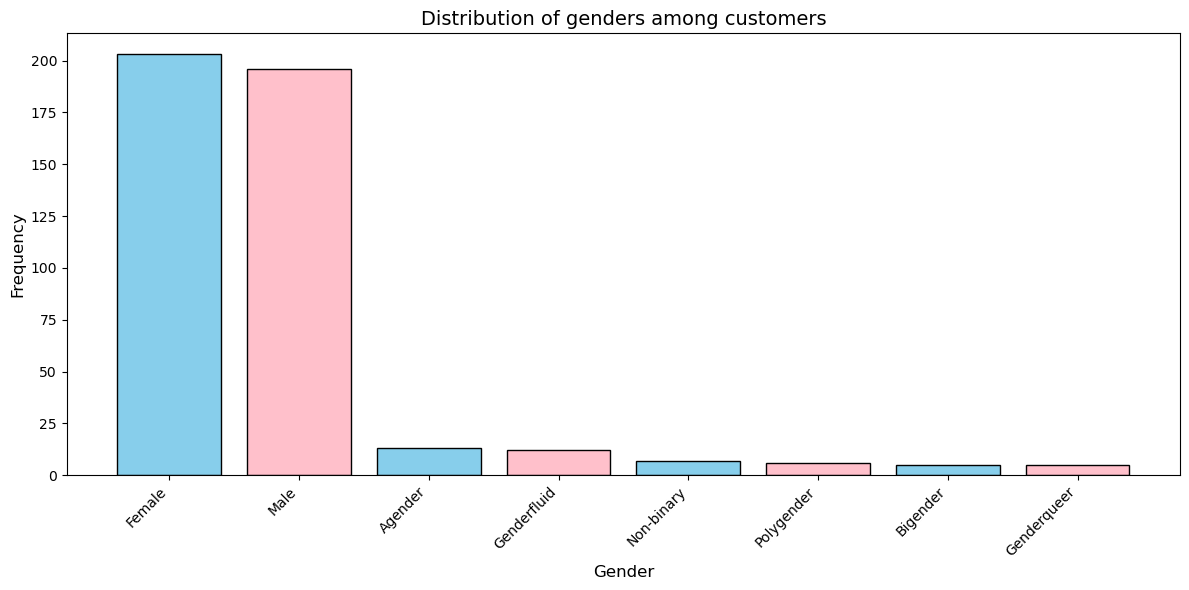

In [662]:
genders = customers["gender"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genders.index, genders.values, color=['skyblue','pink'], edgecolor='black')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of genders among customers', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()


# 2( פילוג כמות לקוחות לפי לאום

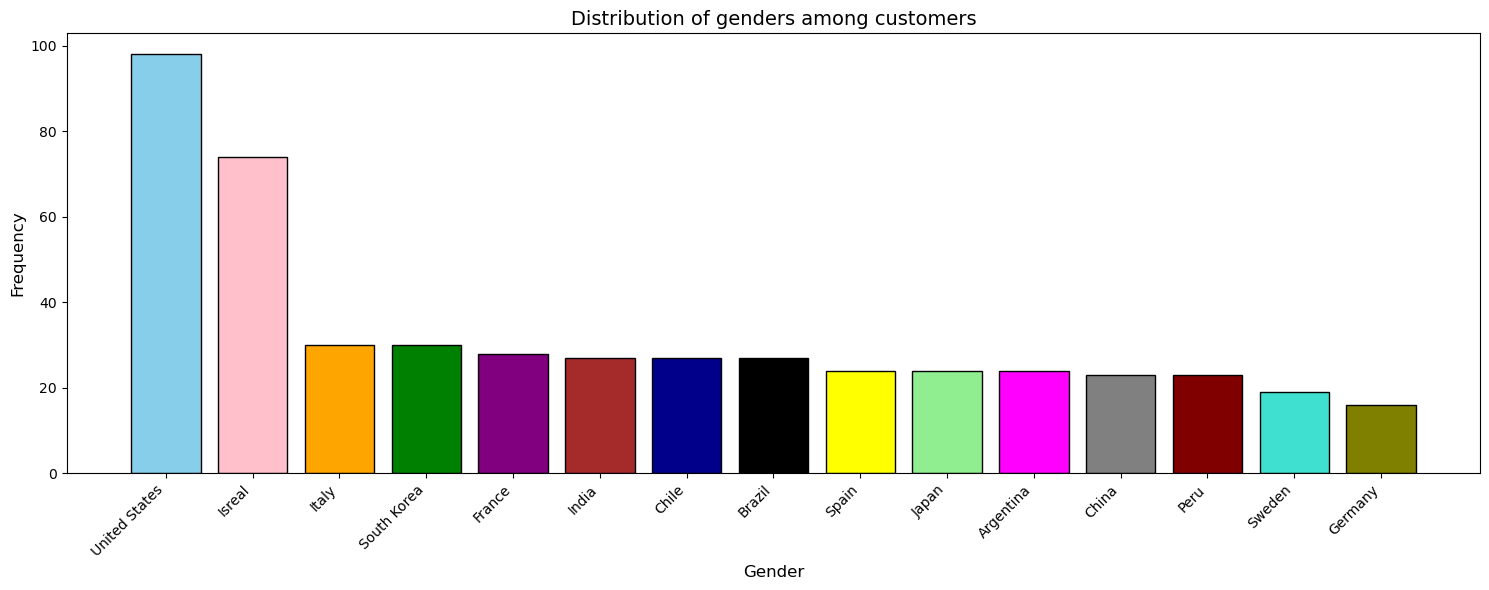

(15,)

C:\Users\123\AppData\Local\Temp\ipykernel_1512\2946259769.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nationalities.index, y=nationalities.values, palette='Spectral')


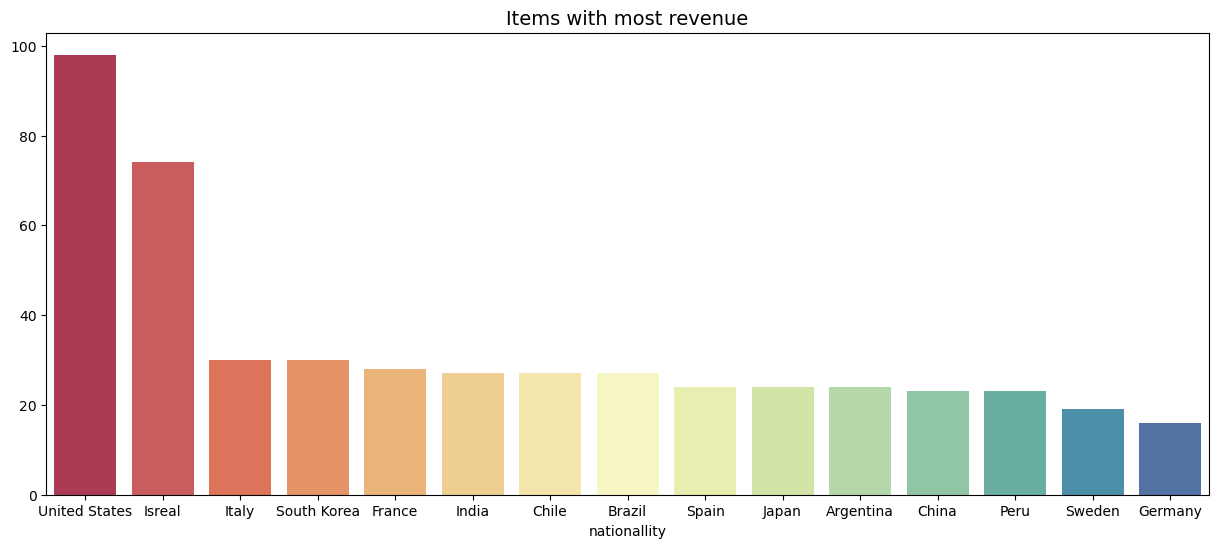

In [998]:
nationalities = customers["nationallity"].value_counts()

plt.figure(figsize=(15, 6))
plt.bar(nationalities.index, nationalities.values, color=['skyblue','pink','orange','green','purple','brown','darkblue','black','yellow','lightgreen','magenta','grey','maroon','turquoise','olive'], edgecolor='black')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of genders among customers', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

display(nationalities.shape)
plt.figure(figsize=(15, 6))
sns.barplot(x=nationalities.index, y=nationalities.values, palette='Spectral')
plt.title('Items with most revenue', fontsize=14)
plt.show()

# 3( הסטוגרמת פילוג לקוחות לפי גיל

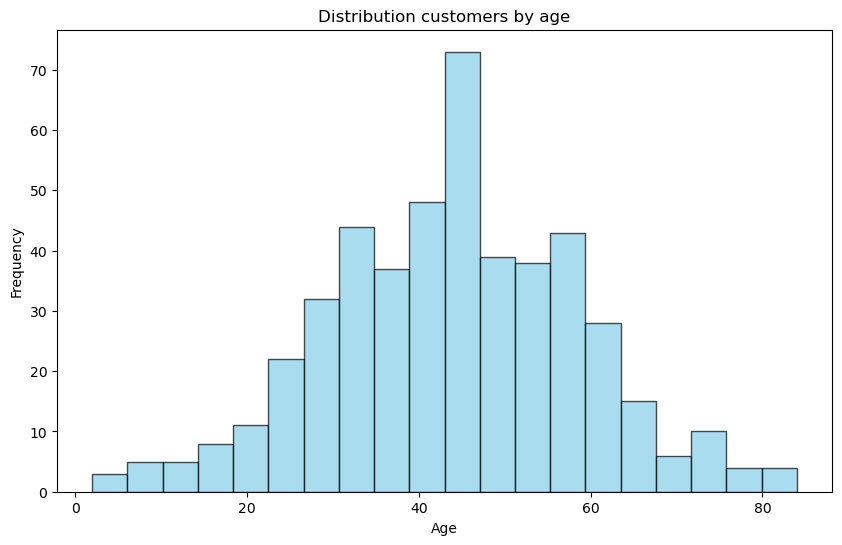

In [714]:
age = customers.sort_values("age")

plt.figure(figsize=(10, 6))
plt.hist(customers['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution customers by age')
plt.show()


# 4( גרף המציג כמות לקוחות חדשים שהצטרפו, לפי שנים

# 5( גרף המציג כמות מכירות לפי חודשים